In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Tables to LateX

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/fifa/fifa_countries_audience.csv'
)

You can just copy and paste:

In [3]:
df.head()

,country,confederation,population_share,tv_audience_share,gdp_weighted_share
0,United States,CONCACAF,4.5,4.3,11.3
1,Japan,AFC,1.9,4.9,9.1
2,China,AFC,19.5,14.8,7.3
3,Germany,UEFA,1.2,2.9,6.3
4,Brazil,CONMEBOL,2.8,7.1,5.4


Or you can print directly to latex:

In [4]:
df.head().to_latex()

'\\begin{tabular}{lllrrr}\n\\toprule\n{} &        country & confederation &  population\\_share &  tv\\_audience\\_share &  gdp\\_weighted\\_share \\\\\n\\midrule\n0 &  United States &      CONCACAF &               4.5 &                4.3 &                11.3 \\\\\n1 &          Japan &           AFC &               1.9 &                4.9 &                 9.1 \\\\\n2 &          China &           AFC &              19.5 &               14.8 &                 7.3 \\\\\n3 &        Germany &          UEFA &               1.2 &                2.9 &                 6.3 \\\\\n4 &         Brazil &      CONMEBOL &               2.8 &                7.1 &                 5.4 \\\\\n\\bottomrule\n\\end{tabular}\n'

#### PDFs look a lot nicer than screenshots:

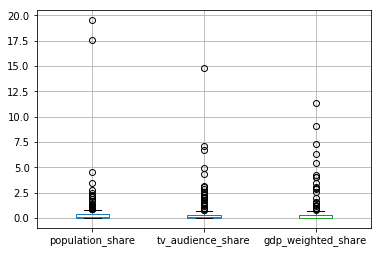

In [5]:
df.boxplot()
plt.savefig('boxplot.pdf', format='pdf')

#### Benchmarking

In [6]:
def expensive_operation_one(lst): 
    return [element * 2 for element in lst]

def expensive_operation_two(lst): 
    result = []
    for element in lst:
        result.append(element * 2)
    return result 

In [7]:
numbers_to_10000 = list(range(10000))

In [8]:
%%timeit 

expensive_operation_one(numbers_to_10000)

631 µs ± 6.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit 

expensive_operation_two(numbers_to_10000)

1.05 ms ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For timing cells in general:

In [10]:
%%time

expensive_operation_one(numbers_to_10000)[:5]

CPU times: user 969 µs, sys: 25 µs, total: 994 µs
Wall time: 1.1 ms


[0, 2, 4, 6, 8]

#### Data Exploration

In [11]:
import json

with open("dev-v2.0.json") as f: 
    input_data = json.loads(f.read())['data']

In [12]:
type(input_data)

list

In [13]:
len(input_data)

35

I end up doing lots of: `type(var)`, `len(var)`, `var.keys()` 

In [14]:
input_data[0].keys()

dict_keys(['title', 'paragraphs'])

In [15]:
type(input_data[0]['paragraphs'])

list

In [16]:
len(input_data[0]['paragraphs'])

39

... Ad infinitum

In [17]:
for datum in input_data[:5]: # 
    print(f"Title: {datum['title']}, Number of paragraphs: {len(datum['paragraphs'])}")

Title: Normans, Number of paragraphs: 39
Title: Computational_complexity_theory, Number of paragraphs: 48
Title: Southern_California, Number of paragraphs: 39
Title: Sky_(United_Kingdom), Number of paragraphs: 22
Title: Victoria_(Australia), Number of paragraphs: 25


#### Error/Result Analysis

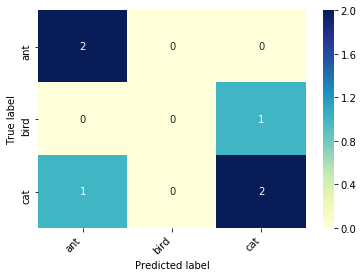

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

labels = ["ant", "bird", "cat"]

cm = confusion_matrix(y_true, y_pred, labels=labels)

result_df = pd.DataFrame(
    cm,
    index=labels,
    columns=labels)

heatmap = sns.heatmap(result_df, annot=True, fmt="d", cmap='YlGnBu')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()
#plt.savefig('confusion_matrix.pdf', format='pdf') ;)

Heatmap also useful for visualizing attention vectors, activations, etc.